# 역별 승하차실적 분석_통합

- 데이터 출처: https://dacon.io/competitions/official/235794/overview/description

###1. 패키지 불러오기

In [ ]:
import pandas as pd #파일불러올 떄
import numpy as np
import matplotlib as mpl #시각화
import matplotlib.pyplot as plt
import seaborn as sns #boxplot등 그래프 그릴 때 필요함
import os #디렉토리
from scipy import stats

import missingno as msno #결측치 확인할 수 있는 패키지
plt.style.use('seaborn')

import warnings #경고 무시하기
warnings.filterwarnings("ignore")

mpl.rcParams['axes.unicode_minus'] = False #마이너스 폰트가 깨지는 것을 방지

%matplotlib inline

# 기본적인 모듈을 import 합니다. 
# mlp.rcParams['axes.unicode_minus'] = False 코드는 그래프에서 마이너스 폰트가 깨지는 문제에 대한 대처입니다.

In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


###2. 데이터 정제 및 병합

In [ ]:
#2018년 데이터
df_2018 = pd.read_csv('역별 승하차실적_2018.csv')
df_2018['운행년도'] = df_2018.운행일자.str.split(' ').str[0] #운행년도 분리
df_2018['운행월'] = df_2018.운행일자.str.split(' ').str[1] #운행월 분리
df_2018['운행일'] = df_2018.운행일자.str.split(' ').str[2] #운행일 분리
df_2018_new.head()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2018년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"20,699",90,2018년,01월,01일
1,2018년 01월 01일,공휴일,경부선,하행,KTX,용산,NaN,"1,907",0,2018년,01월,01일
2,2018년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,173,0,2018년,01월,01일
3,2018년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,"1,674",44,2018년,01월,01일
4,2018년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,"3,015","5,302",2018년,01월,01일


In [ ]:
#2019년 데이터
df_2019 = pd.read_csv('역별 승하차실적_2019.csv')
df_2019['운행년도'] = df_2019.운행일자.str.split(' ').str[0] #운행년도 분리
df_2019['운행월'] = df_2019.운행일자.str.split(' ').str[1] #운행월 분리
df_2019['운행일'] = df_2019.운행일자.str.split(' ').str[2] #운행일 분리
df_2019.head()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2019년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"18,130",34,2019년,01월,01일
1,2019년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,634,4,2019년,01월,01일
2,2019년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,"1,602",54,2019년,01월,01일
3,2019년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,"2,214","4,053",2019년,01월,01일
4,2019년 01월 01일,공휴일,경부선,하행,KTX,동대구,NaN,"1,854","6,884",2019년,01월,01일


In [ ]:
#2020년 데이터
df_2020 = pd.read_csv('역별 승하차실적_2020.csv')
df_2020['운행년도'] = df_2020.운행일자.str.split(' ').str[0] #운행년도 분리
df_2020['운행월'] = df_2020.운행일자.str.split(' ').str[1] #운행월 분리
df_2020['운행일'] = df_2020.운행일자.str.split(' ').str[2] #운행일 분리
df_2020.head()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2020년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"17,858",27,2020년,01월,01일
1,2020년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,708,2,2020년,01월,01일
2,2020년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,"1,744",65,2020년,01월,01일
3,2020년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,"2,091","4,500",2020년,01월,01일
4,2020년 01월 01일,공휴일,경부선,하행,KTX,동대구,NaN,"1,688","6,774",2020년,01월,01일


In [ ]:
#2019년 데이터
df_2021 = pd.read_csv('역별 승하차실적_2021.csv')
df_2021['운행년도'] = df_2021.운행일자.str.split(' ').str[0] #운행년도 분리
df_2021['운행월'] = df_2021.운행일자.str.split(' ').str[1] #운행월 분리
df_2021['운행일'] = df_2021.운행일자.str.split(' ').str[2] #운행일 분리
df_2021.head()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2021년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"6,561",7,2021년,01월,01일
1,2021년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,355,0,2021년,01월,01일
2,2021년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,844,24,2021년,01월,01일
3,2021년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,877,"1,932",2021년,01월,01일
4,2021년 01월 01일,공휴일,경부선,하행,KTX,동대구,NaN,736,"3,281",2021년,01월,01일


- 데이터 병합

In [ ]:
df=pd.concat([df_2018_new, df_2019, df_2020, df_2021], ignore_index=True) #2018, 2019, 2020, 2021데이터 병합

In [ ]:
df.head() #병합된 데이터 확인

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2018년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,"20,699",90,2018년,01월,01일
1,2018년 01월 01일,공휴일,경부선,하행,KTX,용산,NaN,"1,907",0,2018년,01월,01일
2,2018년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,173,0,2018년,01월,01일
3,2018년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,"1,674",44,2018년,01월,01일
4,2018년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,"3,015","5,302",2018년,01월,01일


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855754 entries, 0 to 1855753
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   운행일자     object 
 1   운행영업일단계  object 
 2   주운행선     object 
 3   상행하행구분   object 
 4   역무열차종    object 
 5   정차역      object 
 6   메트릭      float64
 7   승차인원수    object 
 8   하차인원수    object 
 9   운행년도     object 
 10  운행월      object 
 11  운행일      object 
dtypes: float64(1), object(11)
memory usage: 169.9+ MB


- 결측값 확인

In [ ]:
for col in df.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msperc)

column:       운행일자	 Percent of NaN value: 0.00%
column:    운행영업일단계	 Percent of NaN value: 0.00%
column:       주운행선	 Percent of NaN value: 0.00%
column:     상행하행구분	 Percent of NaN value: 0.00%
column:      역무열차종	 Percent of NaN value: 0.00%
column:        정차역	 Percent of NaN value: 0.00%
column:        메트릭	 Percent of NaN value: 100.00%
column:      승차인원수	 Percent of NaN value: 0.00%
column:      하차인원수	 Percent of NaN value: 0.00%
column:       운행년도	 Percent of NaN value: 0.00%
column:        운행월	 Percent of NaN value: 0.00%
column:        운행일	 Percent of NaN value: 0.00%


메트릭 외 결측값 없음

- 데이터타입 확인 후 승차인원, 하차인원 정수형을 타입변환

In [ ]:
#숫자 , 제거(float type으로 변환위해)
df["승차인원수"] = df["승차인원수"].str.replace(',', '')
df["하차인원수"] = df["하차인원수"].str.replace(',', '')

In [ ]:
##데이터타입 정수로 변환
df['하차인원수'] = df.하차인원수.astype(int)
df['승차인원수'] = df.하차인원수.astype(int)

In [ ]:
df.dtypes #바뀐 것 확인

운행일자        object
운행영업일단계     object
주운행선        object
상행하행구분      object
역무열차종       object
정차역         object
메트릭        float64
승차인원수        int64
하차인원수        int64
운행년도        object
운행월         object
운행일         object
dtype: object

###3. 전체 데이터 EDA
##### 1) 지역별 통행량
##### 2) 연도 별 통행량
##### 3) 월별 통행량

In [ ]:
df.head() #데이터 확인

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
0,2018년 01월 01일,공휴일,경부선,하행,KTX,서울,NaN,90,90,2018년,01월,01일
1,2018년 01월 01일,공휴일,경부선,하행,KTX,용산,NaN,0,0,2018년,01월,01일
2,2018년 01월 01일,공휴일,경부선,하행,KTX,영등포,NaN,0,0,2018년,01월,01일
3,2018년 01월 01일,공휴일,경부선,하행,KTX,수원,NaN,44,44,2018년,01월,01일
4,2018년 01월 01일,공휴일,경부선,하행,KTX,대전,NaN,5302,5302,2018년,01월,01일


In [ ]:
df.tail()

,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일
1855749,2021년 05월 31일,평일,강릉선,상행,KTX-호남,서원주,NaN,16,16,2021년,05월,31일
1855750,2021년 05월 31일,평일,강릉선,상행,KTX-호남,횡성,NaN,32,32,2021년,05월,31일
1855751,2021년 05월 31일,평일,강릉선,상행,KTX-호남,둔내,NaN,6,6,2021년,05월,31일
1855752,2021년 05월 31일,평일,강릉선,상행,KTX-호남,평창,NaN,25,25,2021년,05월,31일
1855753,2021년 05월 31일,평일,강릉선,상행,KTX-호남,진부,NaN,21,21,2021년,05월,31일


In [ ]:
#통합데이터 csv파일로 저장
df.to_csv('df_all.csv', index=True) 

#### 1) 지역별 통행량

In [ ]:
#정차역-하차인원수만 추출
station=df[['정차역', '하차인원수']]
station.head()

,정차역,하차인원수
0,서울,90
1,용산,0
2,영등포,0
3,수원,44
4,대전,5302


In [ ]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855754 entries, 0 to 1855753
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   정차역     object
 1   하차인원수   int64 
dtypes: int64(1), object(1)
memory usage: 28.3+ MB


In [ ]:
station['하차인원수'].sum() #코로나 이전 총 통행량

402514983

In [ ]:
station_result=station.groupby(station['정차역'])['하차인원수'].sum()#groupby로 데이터 묶음
station_result=station_result.reset_index()

In [ ]:
station_result.info() #데이터 구조 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   정차역     291 non-null    object
 1   하차인원수   291 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


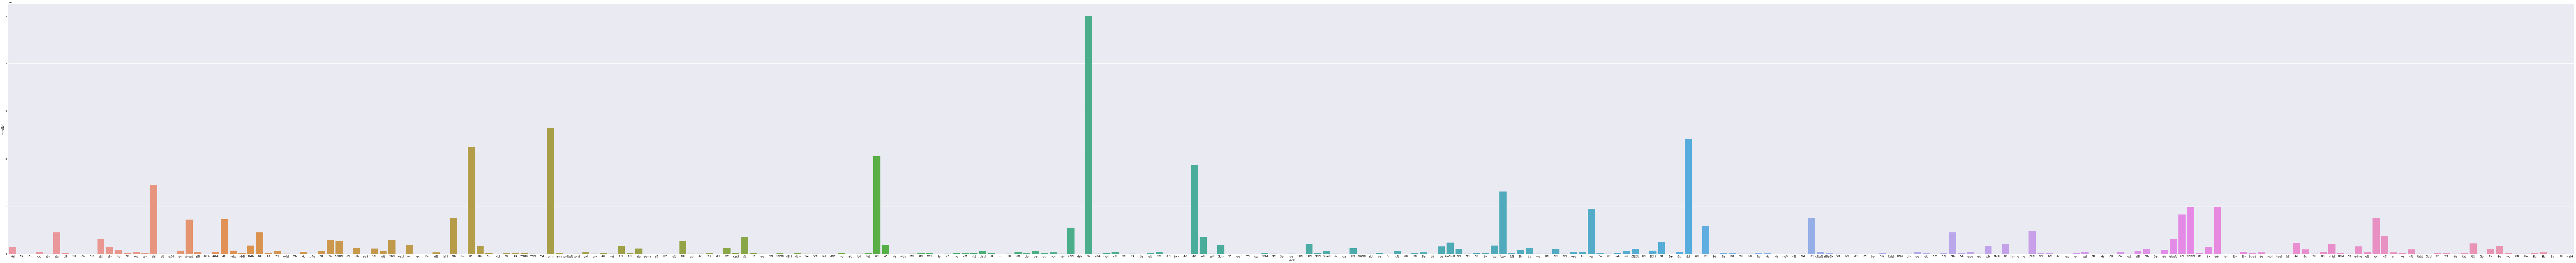

In [ ]:
fig, ax = plt.subplots(figsize = (200, 20))

sns.barplot(data = station_result, y = "하차인원수", x = "정차역")

광명, 대전, 동대구, 부산, 서울, 수원, 영등포, 오송, 용산이 이용량이 많았다
- 이용객 특정 숫자 이상 지역
- 강릉, 목포, 전주지역 역 매칭 후 이용객 확인
- 운행 영업일 따른 이용객 분석

#### 2) 연도별 통행량

In [ ]:
#pd.set_option('display.max_rows', None)
year_result=df.groupby(df['운행년도'])['하차인원수'].sum()
year_result=year_result.reset_index()
year_result

,운행년도,하차인원수
0,2018년,130025769
1,2019년,145967979
2,2020년,89272930
3,2021년,37248305


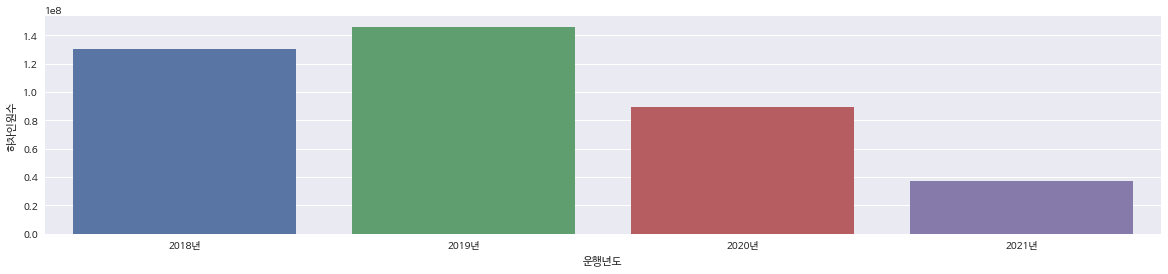

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = year_result, y = "하차인원수", x = "운행년도")

- 2018년도보다 2019년도에 통행량 증가(130,025,769->145,967,979)
- 2019년도 보다 2020년에 통행량의 현저한 급감(145,967,979->89,272,930)
- 2021년도에는 5월까지의 데이터만 존재하기 때문에 비교가 어렵다.


#### 3) 월별 통행량

In [ ]:
month_result=df.groupby(df['운행월'])['하차인원수'].sum()
month_result=month_result.reset_index()
month_result

,운행월,하차인원수
0,01월,39907086
1,02월,24957666
2,03월,35711602
3,04월,37312503
4,05월,42514149
5,06월,31256230
6,07월,31582627
7,08월,32159706
8,09월,30242089
9,10월,33355324


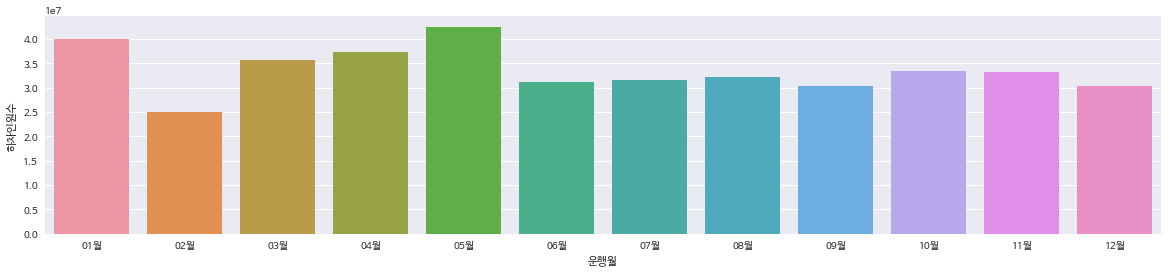

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = month_result, y = "하차인원수", x = "운행월")

그 외에는 비슷했으나 상대적으로 공휴일이 몰려있는(어린이날, 부처님오신 날, 어버이날 등등) 5월의 통행량이 제일 많았음

## 4. 통합 철도량 데이터 역-지역 그룹핑(강릉, 목포, 전주)

In [ ]:
#####강릉지역 데이터만 추출 후 병합
#강릉
gg=df[df['정차역']=='강릉']

#정동진
jj=df[df['정차역']=='정동진']

gang=pd.concat([gg,jj], ignore_index=True)
gang['place'] = '강릉'
#gang.head()

In [ ]:
gang['하차인원수'].sum() #강릉지역 총 통행량

4830489

In [ ]:
#####목포지역 데이터만 추출 후 병합
#목포
mm=df[df['정차역']=='목포']

#임성리
ii=df[df['정차역']=='임성리']

mok=pd.concat([mm,ii], ignore_index=True)
mok['place'] = '목포'
#mok.head()

In [ ]:
#####전주지역 데이터만 추출 후 병합
jeon=df[df['정차역']=='전주']
df['place'] = '전주'
jeon.head()

,Unnamed: 0,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일,place
613,613,2018년 01월 01일,공휴일,전라선,하행,KTX,전주,NaN,1028,1028,2018년,01월,01일,전주
644,644,2018년 01월 01일,공휴일,전라선,하행,무궁화호,전주,NaN,928,928,2018년,01월,01일,전주
671,671,2018년 01월 01일,공휴일,전라선,하행,누리로,전주,NaN,89,89,2018년,01월,01일,전주
686,686,2018년 01월 01일,공휴일,전라선,하행,KTX-산천,전주,NaN,888,888,2018년,01월,01일,전주
709,709,2018년 01월 01일,공휴일,전라선,하행,ITX-새마을,전주,NaN,162,162,2018년,01월,01일,전주


In [ ]:
goal=pd.concat([gang, mok, jeon], ignore_index=True) #지역별 데이터 병합
goal.head()

,Unnamed: 0,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일,place
0,1504,2018년 01월 01일,공휴일,강릉선,하행,KTX-산천,강릉,NaN,326,326,2018년,01월,01일,강릉
1,1508,2018년 01월 01일,공휴일,강릉선,하행,KTX-호남,강릉,NaN,5188,5188,2018년,01월,01일,강릉
2,1516,2018년 01월 01일,공휴일,강릉선,상행,KTX-산천,강릉,NaN,0,0,2018년,01월,01일,강릉
3,1520,2018년 01월 01일,공휴일,강릉선,상행,KTX-호남,강릉,NaN,0,0,2018년,01월,01일,강릉
4,3088,2018년 01월 02일,주중,강릉선,하행,KTX-호남,강릉,NaN,3610,3610,2018년,01월,02일,강릉


In [ ]:
goal.to_csv("/content/drive/Shareddrives/빅데이터/관광객분석/gangmokjeon_all.csv", header=True, index=False) #csv파일로 저장

In [ ]:
station_result=goal.groupby(goal['place'])['하차인원수'].sum()
station_result=station_result.reset_index()
station_result.head()

,place,하차인원수
0,강릉,4830489
1,목포,2713061
2,전주,4507099


## 5. 강릉, 목포, 전주 이용량분석
1) 강릉, 목포, 전주 총 이용객 수  
2) 정차역별 하차인원수

### 1) 강릉,목포, 전주 총 이용객수

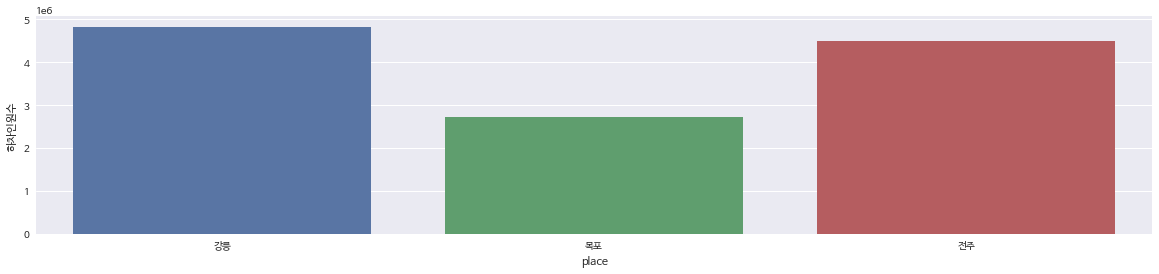

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = station_result, y = "하차인원수", x = "place")

- 강릉지역의 이용객수가 가장 많았다
- 강릉>전주>목포

### 2) 정차역별 하차인원수(강릉, 목포, 전주)

In [ ]:
df1=goal.groupby(['place','정차역'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df1)

  place  정차역    하차인원수
0    강릉   강릉  4469418
1    강릉  정동진   361071
2    목포   목포  2702464
3    목포  임성리    10597
4    전주   전주  4507099


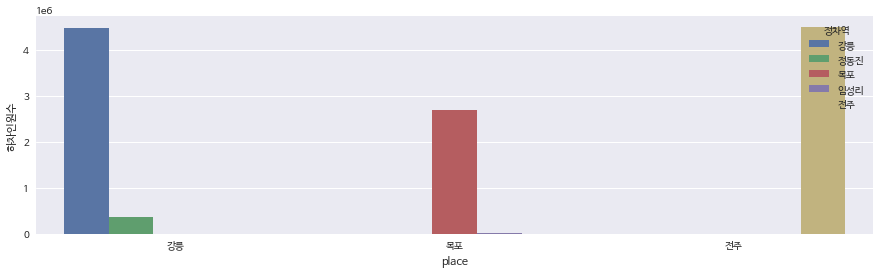

In [ ]:
fig, ax = plt.subplots(figsize = (15, 4))
sns.barplot(data = df1, y = "하차인원수", x = "place", hue="정차역")

-강릉지역에서는 강릉역, 목포지역에서는 목포역, 전주지역에서는 전주역이 가장 이용객이 많았다

## 6. 운행일별 승객수 세부 분석(공휴일, 명절, 주중, 평일, 표준)
1) 운행 영업일별 하차인원수(강릉, 목포, 전주)  
2) 운행 영업일별 하차인원수(2018 ~ 2021)  
3) 운행 월별 하차인원수(2018 ~ 2021)  
4) 운행월별 하차인원수(강릉, 목포, 전주)  
5) 운행 연도별 하차인원수(강릉, 목포, 전주)  

### 1) 운행영업일별 하차인원수(강릉, 목포, 전주)

In [ ]:
df2=goal.groupby(['place','운행영업일단계'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df2)

   place 운행영업일단계    하차인원수
0     강릉     공휴일   174806
1     강릉   명절대수송   180981
2     강릉      주중  1416614
3     강릉      평일  1322261
4     강릉      표준  1735827
5     목포     공휴일    85726
6     목포   명절대수송   116767
7     목포      주중   917643
8     목포      평일   779785
9     목포      표준   813140
10    전주     공휴일   158124
11    전주   명절대수송   152577
12    전주      주중  1462949
13    전주      평일  1240798
14    전주      표준  1492651


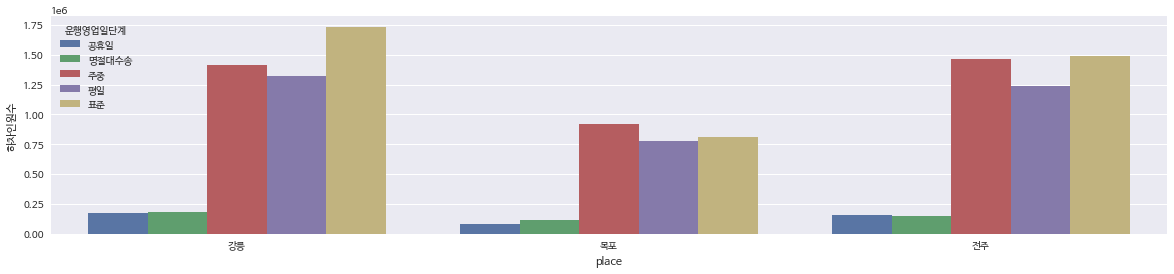

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df2, y = "하차인원수", x = "place", hue="운행영업일단계")

- 세 지역 모두 표준과 주중이용량이 제일 많았다.
- 생각보다 공휴일의 이용객수는 많지 않았다.

### 2) 운행영업일별 하차인원수(2018, 2019, 2020, 2021)

In [ ]:
df3=goal.groupby(['운행년도','운행영업일단계'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df3)

     운행년도 운행영업일단계    하차인원수
0   2018년     공휴일   144008
1   2018년   명절대수송   101429
2   2018년      주중  1123770
3   2018년      평일  1040439
4   2018년      표준  1358434
5   2019년     공휴일   152350
6   2019년   명절대수송   192810
7   2019년      주중  1374328
8   2019년      평일  1197810
9   2019년      표준  1501570
10  2020년     공휴일    92934
11  2020년   명절대수송   121537
12  2020년      주중   932706
13  2020년      평일   775735
14  2020년      표준   814330
15  2021년     공휴일    29364
16  2021년   명절대수송    34549
17  2021년      주중   366402
18  2021년      평일   328860
19  2021년      표준   367284


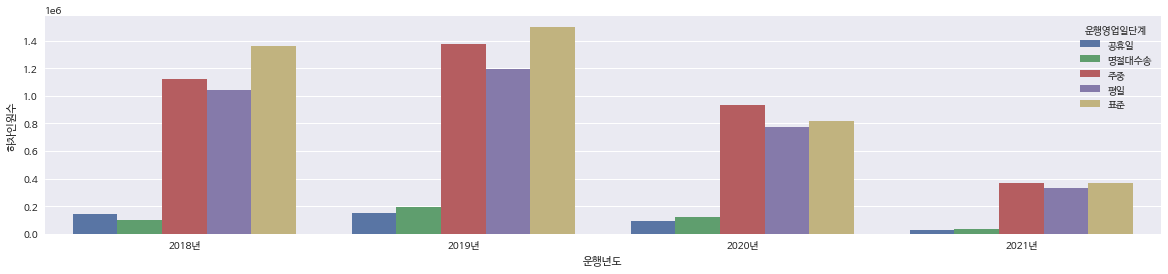

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df3, y = "하차인원수", x = "운행년도", hue="운행영업일단계")

- 연도별 분류에서도 표준, 주중 이용객의 수가 가장 많았다.

### 3) 운행월별 하차인원수

In [ ]:
df4=goal.groupby(['운행년도','운행월'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df4)

     운행년도  운행월   하차인원수
0   2018년  01월  349937
1   2018년  03월  318594
2   2018년  04월  321658
3   2018년  05월  368438
4   2018년  06월  327424
5   2018년  07월  319222
6   2018년  08월  368449
7   2018년  09월  345502
8   2018년  10월  355437
9   2018년  11월  336392
10  2018년  12월  357027
11  2019년  01월  341003
12  2019년  02월  366747
13  2019년  03월  339195
14  2019년  04월  345346
15  2019년  05월  408853
16  2019년  06월  367974
17  2019년  07월  356617
18  2019년  08월  421596
19  2019년  09월  349026
20  2019년  10월  372313
21  2019년  11월  356832
22  2019년  12월  393366
23  2020년  01월  381695
24  2020년  02월  214362
25  2020년  03월  128846
26  2020년  04월  171823
27  2020년  05월  242726
28  2020년  06월  236477
29  2020년  07월  272428
30  2020년  08월  264168
31  2020년  09월  174888
32  2020년  10월  247458
33  2020년  11월  249145
34  2020년  12월  153226
35  2021년  01월  159342
36  2021년  02월  205457
37  2021년  03월  230946
38  2021년  04월  245037
39  2021년  05월  285677


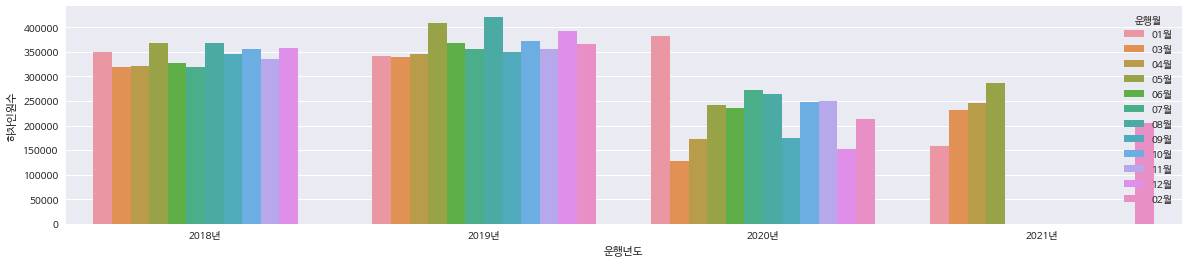

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df4, y = "하차인원수", x = "운행년도", hue="운행월")

- 2018년도에는 1월, 4월, 7월의 이용객이 많았다
- 2019년도에는 4월, 7월의 이용객이 많았다
- 2020년 1월 이후 이용객이 급감했다.
- 2021년에는 이용객이 증가하고 있는 추세로 보이나, 이는 2020년과 같은 추세이다.

In [ ]:
df5=goal.groupby(['place','운행월'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df5)

   place  운행월   하차인원수
0     강릉  01월  526666
1     강릉  02월  321061
2     강릉  03월  384460
3     강릉  04월  408612
4     강릉  05월  499959
5     강릉  06월  381319
6     강릉  07월  401406
7     강릉  08월  477616
8     강릉  09월  333059
9     강릉  10월  375126
10    강릉  11월  353652
11    강릉  12월  367553
12    목포  01월  266488
13    목포  02월  172947
14    목포  03월  232662
15    목포  04월  255752
16    목포  05월  291372
17    목포  06월  205859
18    목포  07월  203579
19    목포  08월  224089
20    목포  09월  209015
21    목포  10월  226407
22    목포  11월  221031
23    목포  12월  203860
24    전주  01월  438823
25    전주  02월  292558
26    전주  03월  400459
27    전주  04월  419500
28    전주  05월  514363
29    전주  06월  344697
30    전주  07월  343282
31    전주  08월  352508
32    전주  09월  327342
33    전주  10월  373675
34    전주  11월  367686
35    전주  12월  332206


###4) 운행월별 하차인원수(강릉, 목포, 전주)

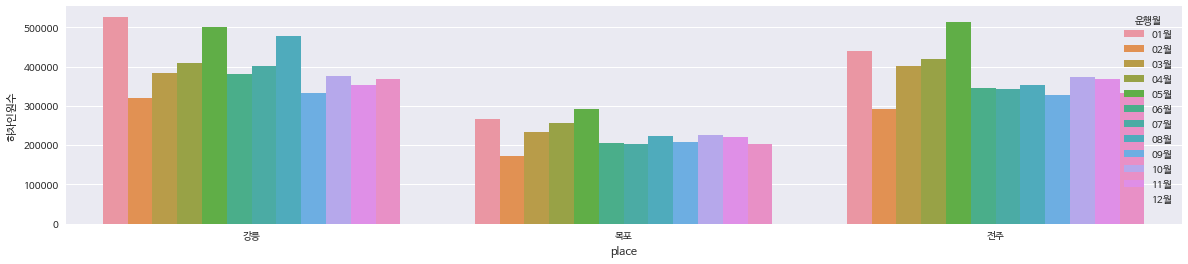

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df5, y = "하차인원수", x = "place", hue="운행월")

강릉지역은 1월, 5월, 8월 / 목포지역은 1월과 5월 / 전주지역도 1월과 5월에 통행량이 제일 많았다. 2021년 데이터에 8월이 포함되지 않았음에도 <b>강릉지역 8월에 사람들이 많이 방문한다는 것이 특징적이다.</b>

###5) 운행 연도별 하차인원수(강릉, 목포, 전주)

In [ ]:
df9=goal.groupby(['place','운행년도'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df9)

   place   운행년도    하차인원수
0     강릉  2018년  1531660
1     강릉  2019년  1837758
2     강릉  2020년  1052998
3     강릉  2021년   408073
4     목포  2018년   836192
5     목포  2019년   982644
6     목포  2020년   631197
7     목포  2021년   263028
8     전주  2018년  1400228
9     전주  2019년  1598466
10    전주  2020년  1053047
11    전주  2021년   455358


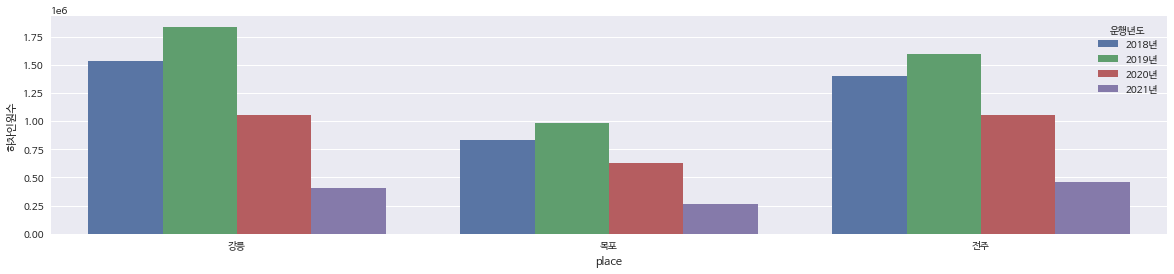

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df9, y = "하차인원수", x = "place", hue="운행년도")

강릉, 목포, 전주 모두 전체 통행량 증감현상을 따라가고 있다.

###6) 전주 국제영화제의 영향?

In [ ]:
jj=goal[goal['운행년도']=='2019년']
jj=jj[jj['place']=='전주']

In [ ]:
df7=jj.groupby(['운행월'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
print(df7)

    운행월   하차인원수
0   01월  120282
1   02월  131011
2   03월  130382
3   04월  128993
4   05월  150067
5   06월  130371
6   07월  126956
7   08월  137879
8   09월  128290
9   10월  139363
10  11월  135025
11  12월  139847


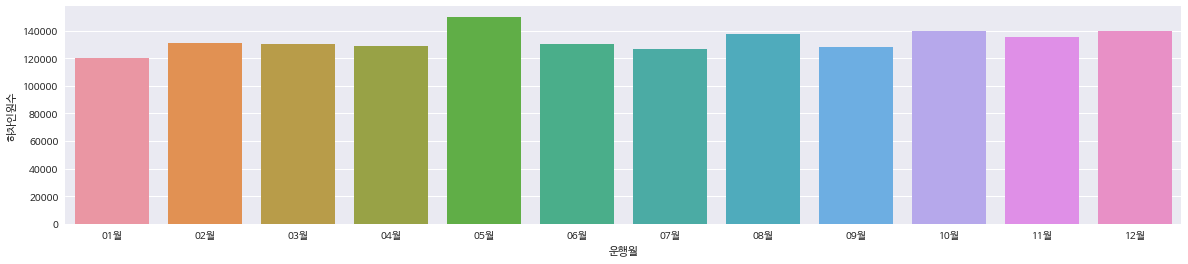

In [ ]:
fig, ax = plt.subplots(figsize = (20, 4))
sns.barplot(data = df7, y = "하차인원수", x = "운행월")

- 전주국제영화제의 영향으로 약 30000건 정도 통행량이 증가한 것을 볼 수 있다

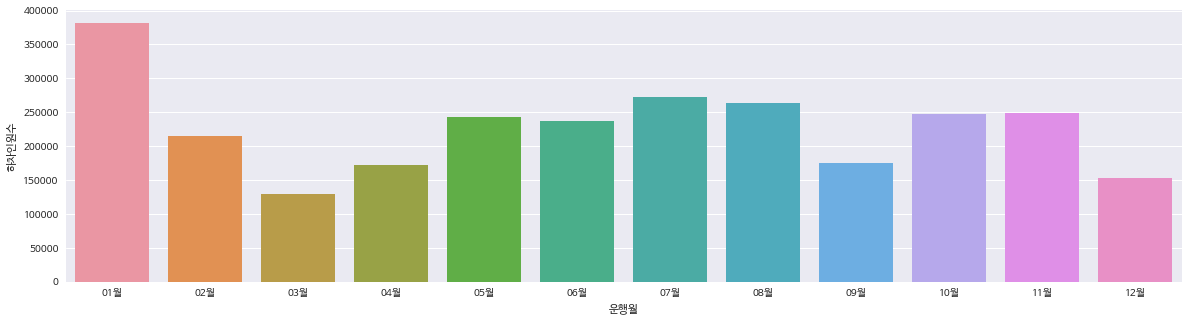

In [ ]:
df8=goal[goal['운행년도']=='2020년']
df8=df8.groupby(['운행월'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (20, 5))
sns.barplot(data = df8, y = "하차인원수", x = "운행월")

In [ ]:
print(df8)

    운행월   하차인원수
0   01월  381695
1   02월  214362
2   03월  128846
3   04월  171823
4   05월  242726
5   06월  236477
6   07월  272428
7   08월  264168
8   09월  174888
9   10월  247458
10  11월  249145
11  12월  153226


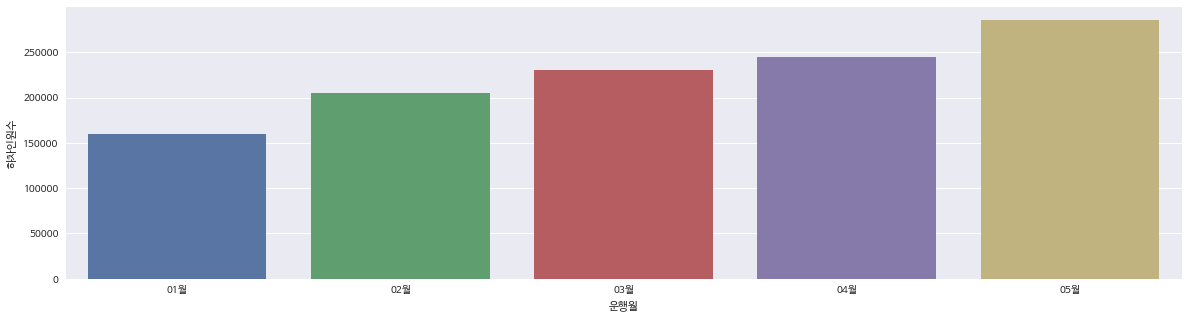

In [ ]:
df9=goal[goal['운행년도']=='2021년']
df9=df9.groupby(['운행월'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (20, 5))
sns.barplot(data = df9, y = "하차인원수", x = "운행월")

## 7. 강릉의 8월, 전주의 5월
### 강릉의 8월과 전주의 5월엔 언제, 왜 사람이 많을까?

### 1) 강릉의 8월

In [ ]:
gang8=goal[goal['운행월']=='08월']
gang8=gang8[gang8['place']=='강릉']
gang8.head()

,Unnamed: 0,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일,place
428,301036,2018년 08월 01일,주중,영동선,하행,무궁화호,강릉,NaN,0,0,2018년,08월,01일,강릉
429,301073,2018년 08월 01일,주중,영동선,상행,무궁화호,강릉,NaN,261,261,2018년,08월,01일,강릉
430,301107,2018년 08월 01일,주중,태백선,하행,무궁화호,강릉,NaN,341,341,2018년,08월,01일,강릉
431,301137,2018년 08월 01일,주중,태백선,상행,무궁화호,강릉,NaN,0,0,2018년,08월,01일,강릉
432,301501,2018년 08월 01일,주중,강릉선,하행,KTX-호남,강릉,NaN,5076,5076,2018년,08월,01일,강릉


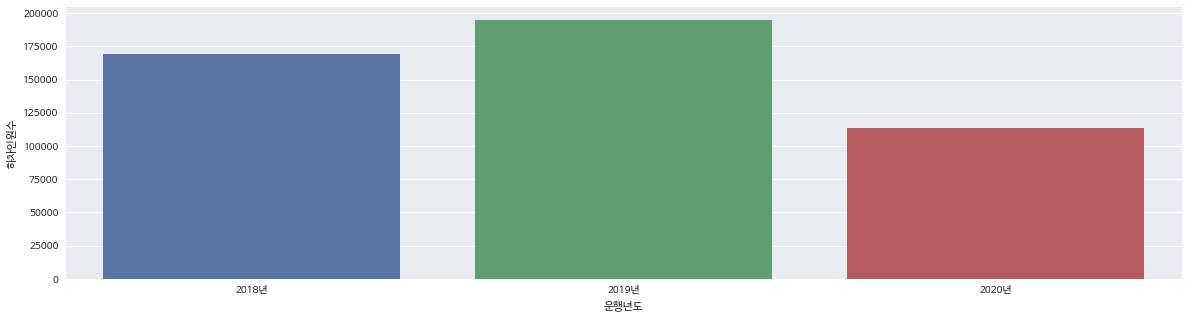

In [ ]:
gang8_1=gang8.groupby(['운행년도'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (20, 5))
sns.barplot(data = gang8_1, y = "하차인원수", x = "운행년도")

In [ ]:
print(gang8_1)

     운행년도 운행영업일단계  하차인원수
0   2018년     공휴일   5601
1   2018년      주중  56034
2   2018년      평일  50758
3   2018년      표준  57049
4   2019년     공휴일   5765
5   2019년      주중  60193
6   2019년      평일  59777
7   2019년      표준  69115
8   2020년     공휴일  10738
9   2020년      주중  36683
10  2020년      평일  28729
11  2020년      표준  37174


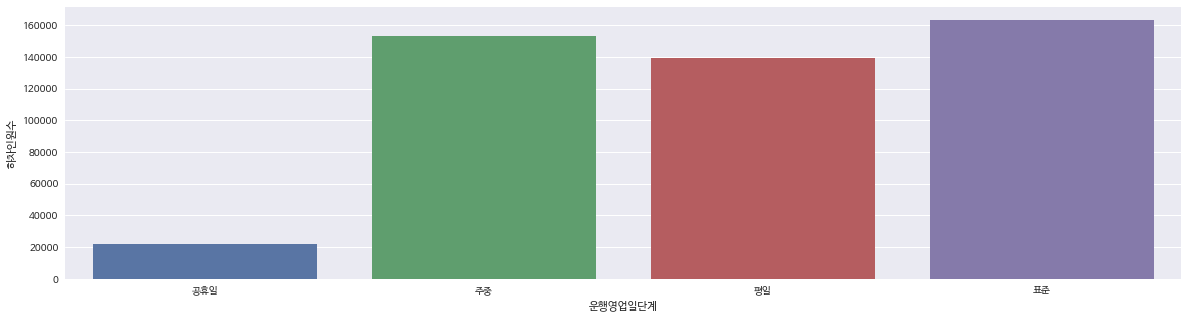

In [ ]:
gang8_2=gang8.groupby(['운행영업일단계'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (20, 5))
sns.barplot(data = gang8_2, y = "하차인원수", x="운행영업일단계")

표준>주중>평일 순으로 하차인원 수가 많다.

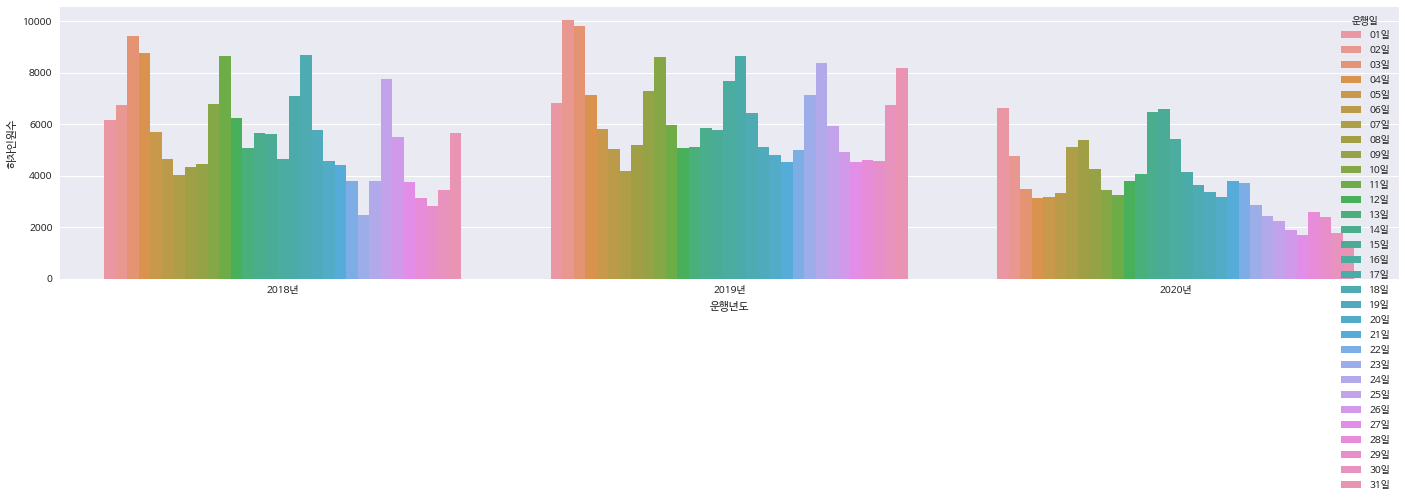

In [ ]:
gang8_2=gang8.groupby(['운행년도', '운행일'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (24, 5))
sns.barplot(data = gang8_2, y = "하차인원수", x="운행년도", hue="운행일")

2018, 2019, 2020 모두 주말이 압도적으로 통행량이 많았다. 운행영업일기준으로만 보았을 때 주중과 주말의 차이가 커보이지 않았지만 이는 주중이 날 수가 더 많아서 통합했기 때문에 전체 수가 커보이는 것처럼 보이는 것 같다. 8월의 강릉은 확실히 관광지로서의 가치가 있다는 결론을 낼 수 있다.

### 2) 전주의 5월도 알아보자

In [ ]:
jeon5=goal[goal['운행월']=='05월']
jeon5=jeon5[jeon5['place']=='전주']
jeon5.head()

,Unnamed: 0,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일,place
29706,149456,2018년 05월 01일,주중,전라선,하행,KTX,전주,NaN,930,930,2018년,05월,01일,전주
29707,149474,2018년 05월 01일,주중,전라선,하행,새마을호,전주,NaN,73,73,2018년,05월,01일,전주
29708,149498,2018년 05월 01일,주중,전라선,하행,무궁화호,전주,NaN,672,672,2018년,05월,01일,전주
29709,149523,2018년 05월 01일,주중,전라선,하행,누리로,전주,NaN,134,134,2018년,05월,01일,전주
29710,149538,2018년 05월 01일,주중,전라선,하행,KTX-산천,전주,NaN,570,570,2018년,05월,01일,전주


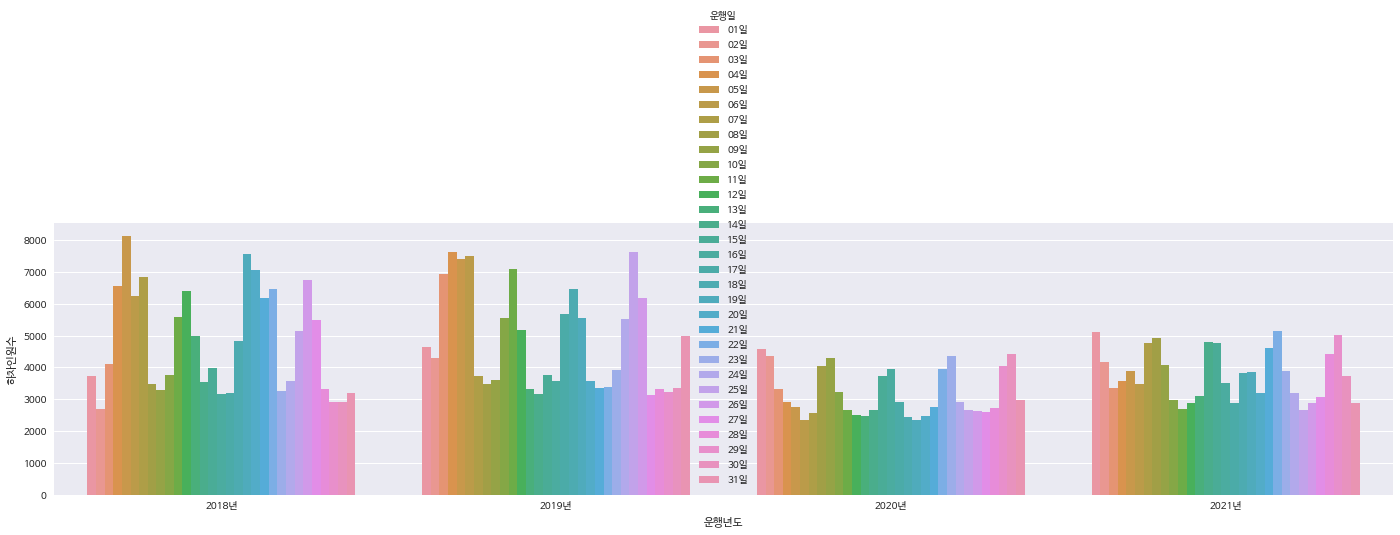

In [ ]:
jeon5_1=jeon5.groupby(['운행년도', '운행일'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (24, 5))
sns.barplot(data = jeon5_1, y = "하차인원수", x="운행년도", hue="운행일")

In [ ]:
gang1=goal[goal['운행월']=='01월']
gang1=gang8[gang8['place']=='강릉']
gang1.head()

,Unnamed: 0,운행일자,운행영업일단계,주운행선,상행하행구분,역무열차종,정차역,메트릭,승차인원수,하차인원수,운행년도,운행월,운행일,place
428,301036,2018년 08월 01일,주중,영동선,하행,무궁화호,강릉,NaN,0,0,2018년,08월,01일,강릉
429,301073,2018년 08월 01일,주중,영동선,상행,무궁화호,강릉,NaN,261,261,2018년,08월,01일,강릉
430,301107,2018년 08월 01일,주중,태백선,하행,무궁화호,강릉,NaN,341,341,2018년,08월,01일,강릉
431,301137,2018년 08월 01일,주중,태백선,상행,무궁화호,강릉,NaN,0,0,2018년,08월,01일,강릉
432,301501,2018년 08월 01일,주중,강릉선,하행,KTX-호남,강릉,NaN,5076,5076,2018년,08월,01일,강릉


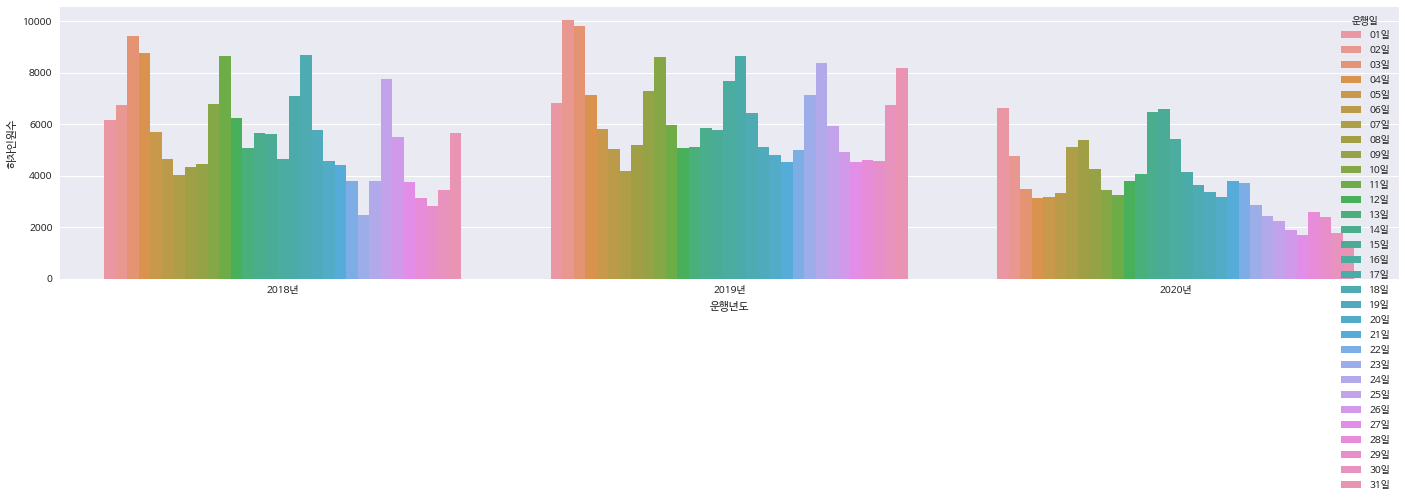

In [ ]:
gang1_1=gang1.groupby(['운행년도', '운행일'])['하차인원수'].agg(**{'하차인원수':'sum'}).reset_index()
fig, ax = plt.subplots(figsize = (24, 5))
sns.barplot(data = gang1_1, y = "하차인원수", x="운행년도", hue="운행일")

5월의 전주는 전주국제영화제와 공휴일 모두 영향을 주고 있다.